# Description

Started as a example to generate heatmaps and a list of correlation matrices, it was further developed to perform specific analysis on my persona data. Some aspects of this, the import, heatmap, and flattended corelation list, are reusable or can be adapted to any data set.

# Import Python Libraries

## Visualization / Heatmap Libraries

In [260]:
#%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## Dataframe and Math Function Libraries

In [261]:
from __future__ import print_function
import numpy as np
import pandas as pd
#!pip install --upgrade pip
#!pip install xlrd

# Load Data And Explore

## Google Download (eventually API)

This code uses a single file fromGoogle's Fit downlad, a summary file that is aggegated from the other files. Download yor Google Fit data from the following link, https://takeout.google.com/, and then reference the summary file in the Import section.

## Import

In [262]:
import os

#PC PAth
#filePath = 'c:\\Users\\igoej\\OneDrive\\Documents\\GitHub\\DataAnalytics\\Data\\2021-03-08 Daily Summaries.csv'

#Mac Path
filePath = '/Users/igoeja/Documents/GitHub/DataAnalytics/Data/2021-03-08 Daily Summaries.csv'

df_fit = pd.read_csv(filePath)
#df_fit.tail()

## Data Review

Uncomment lines to examine aspects of the data set

In [263]:
#df_fit.head()

In [264]:
#df_fit.info()

In [265]:
#df_fit.describe()

In [266]:
#df_fit.describe(include='object')

# Shared Functions

## Correlation

In [267]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

In [268]:
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened


In [269]:
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

## Basic

In [270]:
def MedianFunction(df, roundValue):
    import statistics as stat
    cleaned = df.dropna()
    return round(stat.median(cleaned), roundValue)

In [271]:
def AverageFunction(df, roundValue):
    cleaned = df.dropna()
    return round(sum(cleaned)/len(cleaned), roundValue)

# Data Clean and Prep

In [272]:
df_fit.dropna(axis=1, how='all', inplace=True)

# Google Specific Fixes

In [273]:
df_fit.set_index('Date')

,Calories (kcal),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average blood glucose (mmol/L),Max blood glucose (mmol/L),Min blood glucose (mmol/L),Blood glucose specimen source,Step count,...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-18,1185.313721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-20,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-21,1339.213242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-22,1778.499743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-04,2488.327260,40.743267,-73.975967,40.743267,-73.975967,8.724088,15.2,3.0,Interstitial fluid,4213.0,...,2071953.0,NaN,NaN,NaN,NaN,NaN,11820000.0,6420000.0,360000.0,NaN
2021-03-05,2043.080274,NaN,NaN,NaN,NaN,8.476475,12.4,5.8,Interstitial fluid,3458.0,...,NaN,NaN,1200000.0,NaN,NaN,NaN,16920000.0,8100000.0,540000.0,NaN
2021-03-06,2866.134066,40.743271,-73.981956,40.761639,-73.972839,8.328589,11.8,4.7,Interstitial fluid,11573.0,...,1972239.0,NaN,13500000.0,NaN,NaN,NaN,5040000.0,2100000.0,360000.0,NaN


## Set Aggregate Values

In [274]:
df_fit['SleepSum'] = df_fit['Deep sleeping duration (ms)'] + df_fit['Light sleeping duration (ms)'] + df_fit['Sleep duration (ms)']
df_fit['sleepSumHours'] = df_fit['SleepSum'] / 3600000

In [275]:
df_fit['basketballMinutes'] = df_fit['Basketball duration (ms)'] / 60000
df_fit['rowingMachineMinutes'] = df_fit['Rowing machine duration (ms)']/ 60000

## Lag/Shift Values

In [276]:
df_fit['rowingMachineMinutesShifted'] = df_fit['rowingMachineMinutes'].shift()
df_fit['moveMinutesCountShifted'] = df_fit['Move Minutes count'].shift()
df_fit['heartPointsShifted'] = df_fit['Heart Points'].shift()
df_fit['distanceShifted'] = df_fit['Distance (m)'].shift()
df_fit['basketballMinutesShifted'] = df_fit['basketballMinutes'].shift()


In [277]:
df_fit.columns

Index(['Date', 'Calories (kcal)', 'Low latitude (deg)', 'Low longitude (deg)',
       'High latitude (deg)', 'High longitude (deg)',
       'Average blood glucose (mmol/L)', 'Max blood glucose (mmol/L)',
       'Min blood glucose (mmol/L)', 'Blood glucose specimen source',
       'Step count', 'Average weight (kg)', 'Max weight (kg)',
       'Min weight (kg)', 'Heart Points', 'Heart Minutes',
       'Average heart rate (bpm)', 'Max heart rate (bpm)',
       'Min heart rate (bpm)', 'Distance (m)', 'Average speed (m/s)',
       'Max speed (m/s)', 'Min speed (m/s)',
       'Average systolic blood pressure (mmHg)',
       'Max systolic blood pressure (mmHg)',
       'Min systolic blood pressure (mmHg)',
       'Average diastolic blood pressure (mmHg)',
       'Max diastolic blood pressure (mmHg)',
       'Min diastolic blood pressure (mmHg)', 'Move Minutes count',
       'Biking duration (ms)', 'Inactive duration (ms)',
       'Unknown duration (ms)', 'Walking duration (ms)',
       'Runni

# Create Correlation Heat Map and List

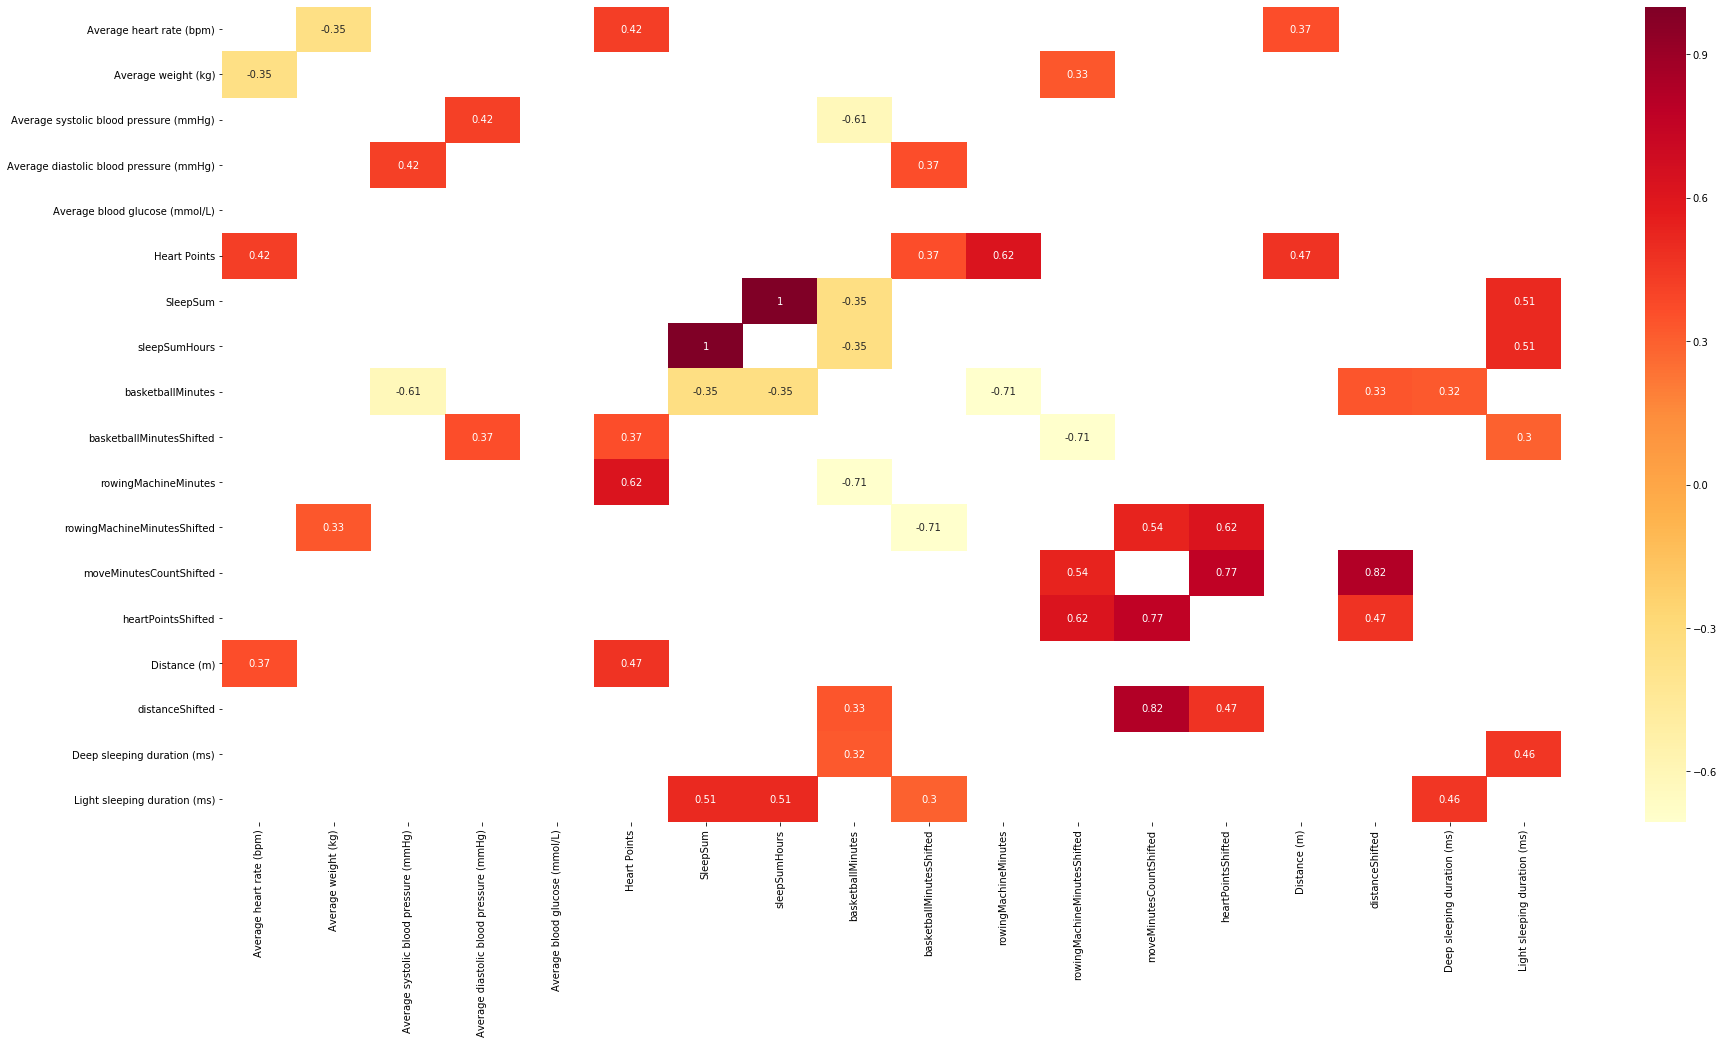

In [278]:
#set data set for analysis
df = df_fit[['Date', 'Average heart rate (bpm)','Average weight (kg)','Average systolic blood pressure (mmHg)','Average diastolic blood pressure (mmHg)','Average blood glucose (mmol/L)','Heart Points','SleepSum', 'sleepSumHours','basketballMinutes', 'basketballMinutesShifted', 'rowingMachineMinutes','rowingMachineMinutesShifted', 'moveMinutesCountShifted','heartPointsShifted','Distance (m)', 'distanceShifted', 'Deep sleeping duration (ms)', 'Light sleeping duration (ms)']]
filterValue = 0.3
plt.figure(figsize=(30,15))
sns.heatmap(corrFilter(df, filterValue), annot=True, cmap="YlOrRd")
plt.show()

In [279]:
corr_fit_filtered = corrFilterFlattened(df, filterValue)
half = corr_fit_filtered.count() / 2
corr_fit_filtered

rowingMachineMinutes                     basketballMinutes                         -0.705547
basketballMinutes                        Average systolic blood pressure (mmHg)    -0.613946
Average heart rate (bpm)                 Average weight (kg)                       -0.354220
basketballMinutes                        sleepSumHours                             -0.345697
basketballMinutesShifted                 Light sleeping duration (ms)               0.300242
basketballMinutes                        Deep sleeping duration (ms)                0.323312
Average weight (kg)                      rowingMachineMinutesShifted                0.329048
basketballMinutes                        distanceShifted                            0.333772
Distance (m)                             Average heart rate (bpm)                   0.365108
Heart Points                             basketballMinutesShifted                   0.365999
basketballMinutesShifted                 Average diastolic blood press

# Measures

## Blood Pressure


In [280]:
filterForLabels(corr_fit_filtered, 'Average systolic blood pressure (mmHg)')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


,Corr
basketballMinutes,-0.613946
Average diastolic blood pressure (mmHg),0.419836


In [281]:
filterForLabels(corr_fit_filtered, 'Average diastolic blood pressure (mmHg)')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
Average systolic blood pressure (mmHg),0.419836
basketballMinutesShifted,0.366380


In [282]:
dia = df['Average diastolic blood pressure (mmHg)']
sys = df['Average systolic blood pressure (mmHg)']
print('BP (avg):', AverageFunction(sys,1), '/', AverageFunction(dia,1))
print('BP (median):',MedianFunction(sys,1), '/', MedianFunction(dia,1))

BP (avg): 125.4 / 80.2
BP (median): 125.4 / 80.0


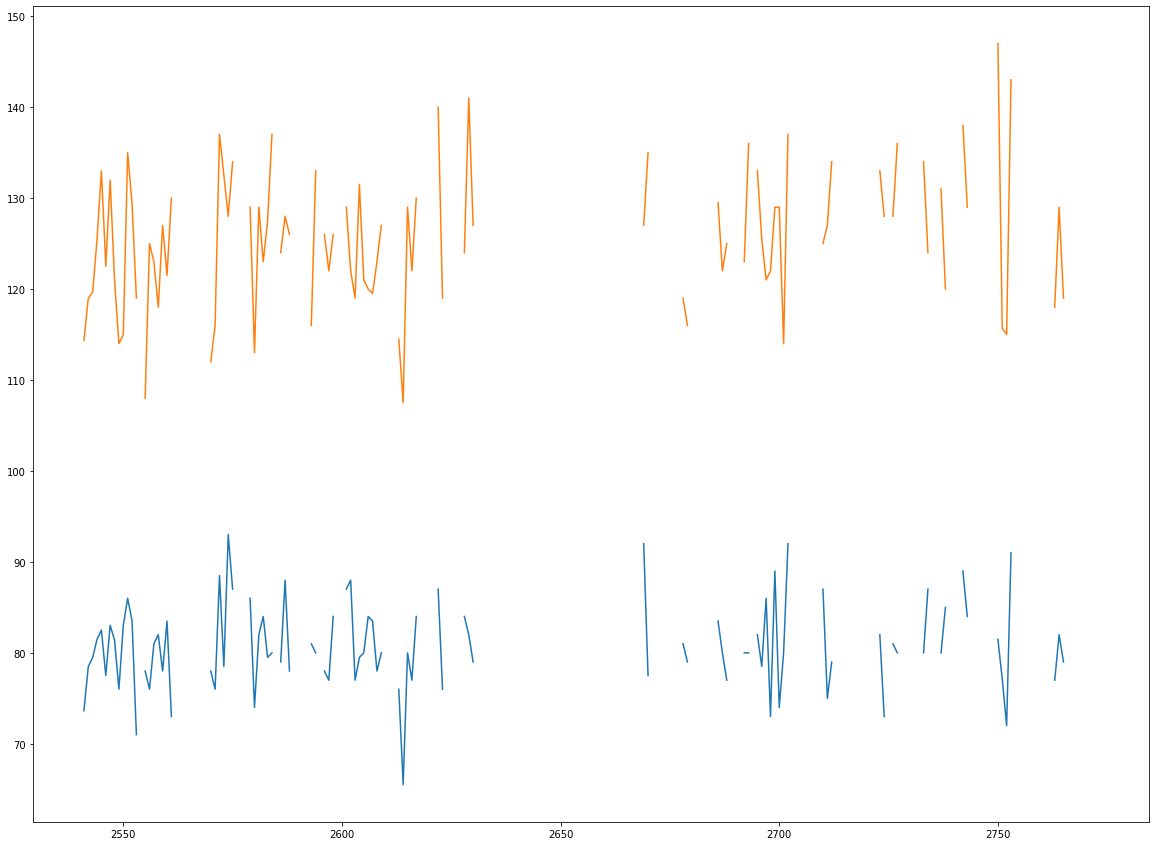

In [283]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average diastolic blood pressure (mmHg)'])
plt.plot(df.index, df['Average systolic blood pressure (mmHg)'])
plt.xlabel = 'None'
plt.show()


(100, 144.83069209955372)

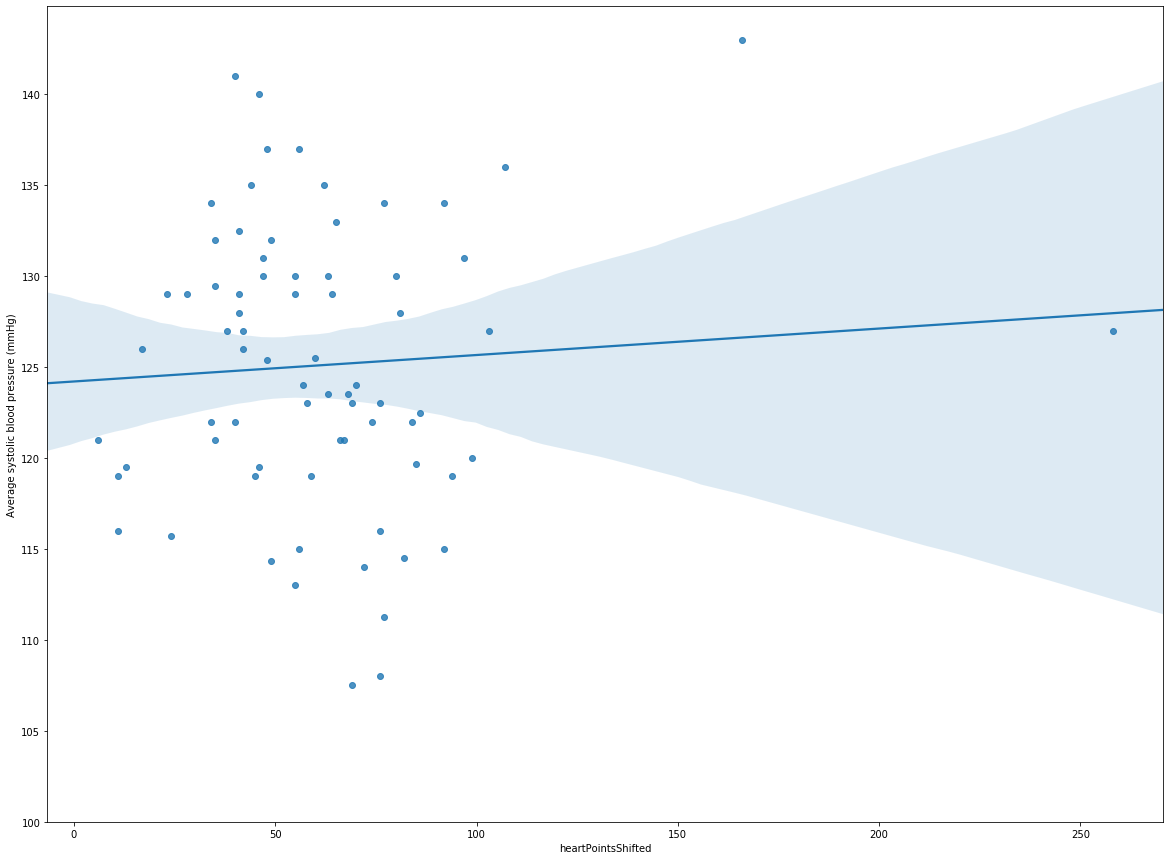

In [284]:
plt.figure(figsize=(20,15))
sns.regplot(x='heartPointsShifted', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(100,)

## Glucose

In [285]:
filterForLabels(corr_fit_filtered, 'Average blood glucose (mmol/L)')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


""


In [286]:
bg = df['Average blood glucose (mmol/L)']
print('BG (mmol/L):', AverageFunction(bg, 1))
print('BG (mmg/dl):', round(AverageFunction(bg, 1) * 18))

BG (mmol/L): 7.7
BG (mmg/dl): 139


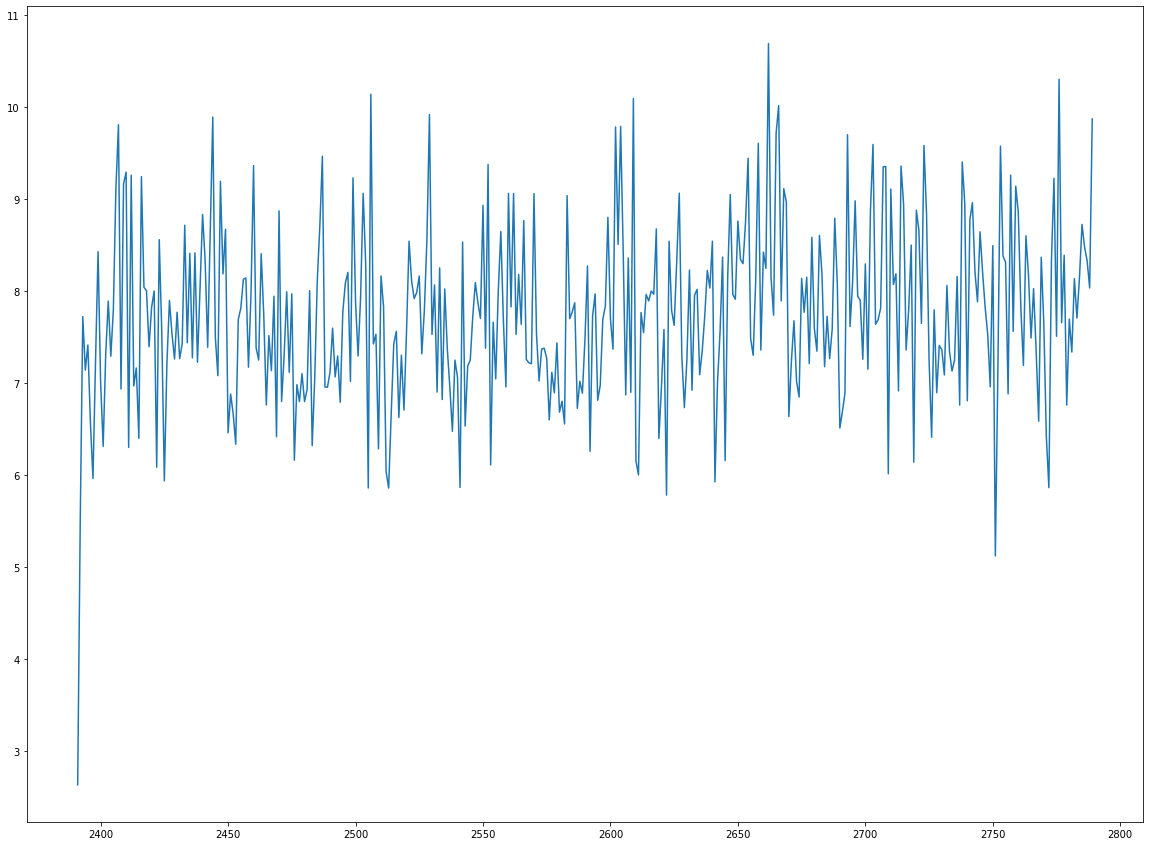

In [287]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average blood glucose (mmol/L)'])
plt.show()

## Weight

In [288]:
filterForLabels(corr_fit_filtered, 'Average weight (kg)')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):
/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
Average heart rate (bpm),-0.354220
rowingMachineMinutesShifted,0.329048


In [289]:
w = df['Average weight (kg)']
print('Weight (kg):', AverageFunction(w, 1))
print('Weight (lbs):', round(AverageFunction(w, 1) * 2.2,1))


Weight (kg): 101.3
Weight (lbs): 222.9


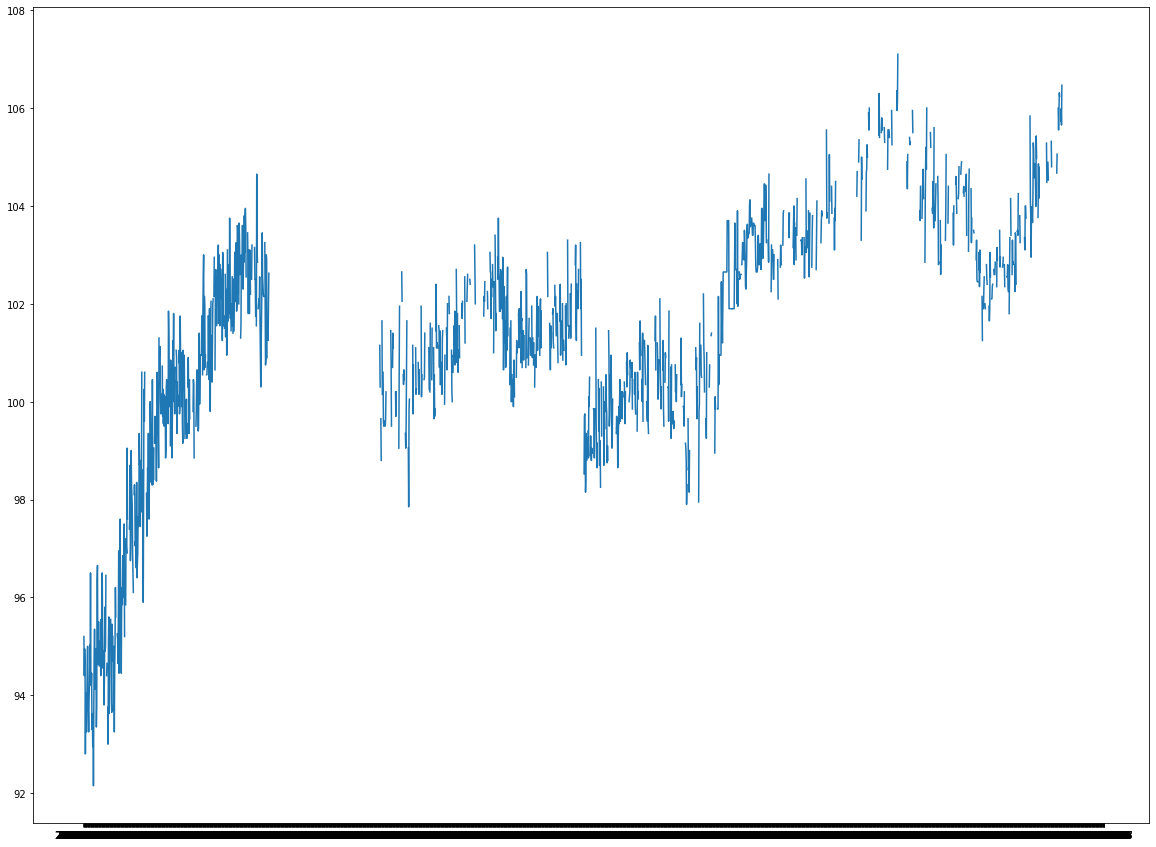

In [290]:
plt.figure(figsize=(20,15))
plt.plot(df['Date'], df['Average weight (kg)'])
plt.show()

## Sleep

In [291]:
filterForLabels(corr_fit_filtered, 'sleepSumHours')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


,Corr
basketballMinutes,-0.345697
Light sleeping duration (ms),0.512251
SleepSum,1.000000


In [292]:
filterForLabels(corr_fit_filtered, 'Deep sleeping duration (ms)')

,Corr
basketballMinutes,0.323312
Light sleeping duration (ms),0.456651


In [293]:
filterForLabels(corr_fit_filtered, 'Light sleeping duration (ms)')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
Deep sleeping duration (ms),0.456651
SleepSum,0.512251
basketballMinutesShifted,0.300242
sleepSumHours,0.512251


In [294]:
print('Sleep:', AverageFunction(df['sleepSumHours'],2))
print('Sleep (Median):', MedianFunction(df['sleepSumHours'], 2))

Sleep: 6.51
Sleep (Median): 6.69


(10, 78.19529228950856)

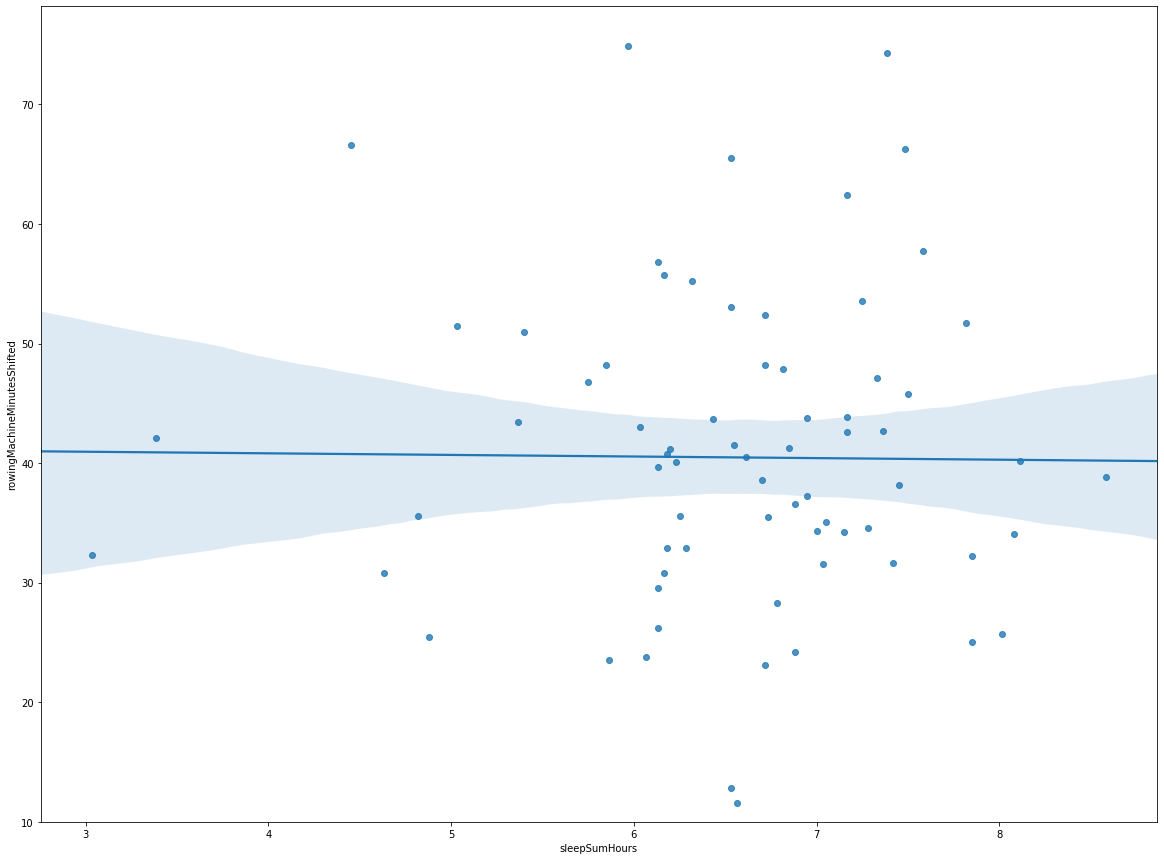

In [295]:
plt.figure(figsize=(20,15))
sns.regplot(x='sleepSumHours', y='rowingMachineMinutesShifted', data=df)
plt.ylim(10,)

## Activity

In [296]:
filterForLabels(corr_fit_filtered, 'distanceShifted')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


,Corr
basketballMinutes,0.333772
moveMinutesCountShifted,0.821265


In [297]:
filterForLabels(corr_fit_filtered, 'rowingMachineMinutesShifted')

,Corr
Average weight (kg),0.329048
moveMinutesCountShifted,0.536718
heartPointsShifted,0.621162


In [298]:
filterForLabels(corr_fit_filtered, 'basketballMinutesShifted')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
Average diastolic blood pressure (mmHg),0.366380
Heart Points,0.365999
Light sleeping duration (ms),0.300242


In [299]:
filterForLabels(corr_fit_filtered, 'moveMinutesCountShifted')

,Corr
rowingMachineMinutesShifted,0.536718
heartPointsShifted,0.771044
distanceShifted,0.821265


In [300]:
filterForLabels(corr_fit_filtered, 'heartPointsShifted')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
moveMinutesCountShifted,0.771044
rowingMachineMinutesShifted,0.621162


## Status and Averages

In [301]:
# latest weight
# average weight, 30 60, 90
# latest BP
# average BP, 30, 60, 90
# average sleep, 30, 60, 90


## Result Check

In [316]:
df_temp = df[(df['Date']> "2021-03-01")]
x = df_temp['distanceShifted']
y = df_temp['moveMinutesCountShifted']
z = np.corrcoef(x, y)
z



array([[1.        , 0.81307081],
       [0.81307081, 1.        ]])

In [308]:
filterForLabels(corr_fit_filtered, 'moveMinutesCountShifted')



,Corr
rowingMachineMinutesShifted,0.536718
heartPointsShifted,0.771044
distanceShifted,0.821265
